In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import re
import funciones as fn

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df

In [2]:
#Leemos los archivos
estadio = pd.read_csv(r'../data/stadiums.csv')
match = pd.read_csv(r'../data/matches.csv')
team = pd.read_csv(r'../data/teams.csv')
player = pd.read_csv(r'../data/players.csv')

### LIMPIAMOS ESTADIO

In [3]:
estadio.head()

,Unnamed: 0,Estadio,Capacidad,Equipo
0,0,Camp Nou,"99,354",Barcelona
1,1,Santiago Bernabeu,81.044,Real Madrid
2,2,Estadio Metropolitano,68.456,Atletico Madrid
3,3,Benito Villamarín,60.721,Real Betis
4,4,Lluís Companys,"60,713",FC Penger


In [4]:
estadio.columns = ['Id', 'Stadium', 'Capacity', 'Team']

In [5]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        66 non-null     int64 
 1   Stadium   66 non-null     object
 2   Capacity  66 non-null     object
 3   Team      66 non-null     object
dtypes: int64(1), object(3)
memory usage: 14.6 KB


In [6]:
lista=[]
for x in estadio.Capacity:
    x = x.replace('.', '').replace(',', '')
    x = int(x)
    lista.append(x)
estadio.Capacity = lista
estadio.head()

,Id,Stadium,Capacity,Team
0,0,Camp Nou,99354,Barcelona
1,1,Santiago Bernabeu,81044,Real Madrid
2,2,Estadio Metropolitano,68456,Atletico Madrid
3,3,Benito Villamarín,60721,Real Betis
4,4,Lluís Companys,60713,FC Penger


In [7]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        66 non-null     int64 
 1   Stadium   66 non-null     object
 2   Capacity  66 non-null     int64 
 3   Team      66 non-null     object
dtypes: int64(2), object(2)
memory usage: 11.1 KB


'N nan cols: 0'

Series([], dtype: float64)

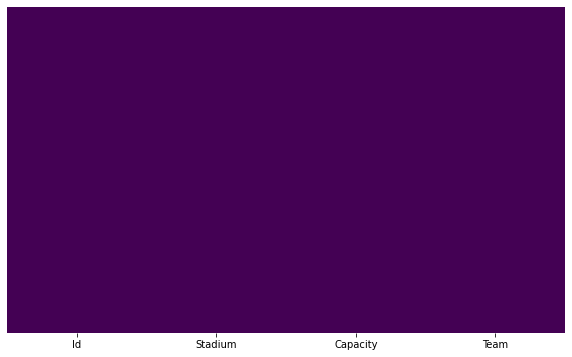

In [8]:
fn.check_nan(estadio)

In [9]:
fn.check_value(estadio, estadio.columns) 

0     1
49    1
35    1
36    1
37    1
Name: Id, dtype: int64
Camp Nou                  1
Montilivi                 1
Carlos Belmonte           1
Coliseum Alfonso Pérez    1
El Helmántico             1
Name: Stadium, dtype: int64
10000    3
81044    1
19336    1
17524    1
17393    1
Name: Capacity, dtype: int64
Barcelona       1
Girona          1
Albacete        1
Getafe          1
Salamanca CF    1
Name: Team, dtype: int64


In [10]:
fn.check_unique(estadio, estadio.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
['Camp Nou' 'Santiago Bernabeu' 'Estadio Metropolitano'
 'Benito Villamarín' 'Lluís Companys' 'La Cartuja' 'San Mamés' 'Mestalla'
 'Ramón Sánchez Pizjuán' 'Estadio RCDE' 'Anoeta' 'Martínez Valero'
 'La Romareda' 'Abanca Riazor' 'Gran Canaria' 'Nueva Condomina'
 'Carlos Tartiere' 'La Rosaleda' 'José Rico Pérez' 'El Molinón' 'Balaídos'
 'José Zorrilla' 'Ciutat de Valencia' 'Ramón de Carranza' 'El Sadar'
 'Estadio de la Cerámica' 'Son Moix' 'Heliodoro Rodríguez López'
 'El Sardinero' 'Nuevo Colombino' 'Estadio del Mediterráneo'
 'Nuevo Arcángel' 'Chapín' 'Mendizorrotza' 'Los Cármenes'
 'Carlos Belmonte' 'Coliseum Alfonso Pérez' 'El Helmántico'
 'Municipal La Línea' 'Estadio Las Gaunas' 'Nuevo Vivero' 'Cartagonova'
 'Romano' 'Nou Estadi' 'Vallecas' 'Castalia' 'El Soto' "Camp d'esports"
 'Jua

In [11]:
estadio.duplicated().any() #No hay duplicados

False

In [12]:
estadio.tail() #Limpios

,Id,Stadium,Capacity,Team
61,61,Ciudad de Málaga ( es ),10816,Atletismo
62,62,Pasarón,10500,Pontevedra
63,63,Álvarez Claro,10000,Melilla
64,64,Linarejos,10000,Linares
65,65,Las Mestas,10000,Marineros de Gijón (fútbol americano) CSI Gijó...


### LIMPIAMOS TEAM

In [13]:
team.tail()

,Unnamed: 0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
37,37,Sporting Gijón,28,27.7,45.7,20,220,"1,800",20.0,22,13,21,1,1,47,1,1.10,0.65,1.75,1.05,1.70
38,38,Tenerife,29,28.5,47.0,20,220,"1,800",20.0,21,13,17,4,5,52,4,1.05,0.65,1.70,0.85,1.50
39,39,UD Ibiza,26,26.7,47.1,20,220,"1,800",20.0,13,9,11,2,2,61,4,0.65,0.45,1.10,0.55,1.00
40,40,Villarreal B,27,22.4,51.4,20,220,"1,800",20.0,23,16,21,2,3,52,3,1.15,0.80,1.95,1.05,1.85
41,41,Zaragoza,28,27.1,55.0,20,220,"1,800",20.0,16,12,15,1,1,48,3,0.80,0.60,1.40,0.75,1.35


In [14]:
team.columns = ['Id', 'Team', 'Pl', 'Age', 'Poss', 'Pj', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR', 'Gls/Pj',
       'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [15]:
team.tail()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
37,37,Sporting Gijón,28,27.7,45.7,20,220,"1,800",20.0,22,13,21,1,1,47,1,1.10,0.65,1.75,1.05,1.70
38,38,Tenerife,29,28.5,47.0,20,220,"1,800",20.0,21,13,17,4,5,52,4,1.05,0.65,1.70,0.85,1.50
39,39,UD Ibiza,26,26.7,47.1,20,220,"1,800",20.0,13,9,11,2,2,61,4,0.65,0.45,1.10,0.55,1.00
40,40,Villarreal B,27,22.4,51.4,20,220,"1,800",20.0,23,16,21,2,3,52,3,1.15,0.80,1.95,1.05,1.85
41,41,Zaragoza,28,27.1,55.0,20,220,"1,800",20.0,16,12,15,1,1,48,3,0.80,0.60,1.40,0.75,1.35


In [16]:
team.info(memory_usage='deep') #Min a Int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        42 non-null     int64  
 1   Team      42 non-null     object 
 2   Pl        42 non-null     int64  
 3   Age       42 non-null     float64
 4   Poss      42 non-null     float64
 5   Pj        42 non-null     int64  
 6   Starts    42 non-null     int64  
 7   Min       42 non-null     object 
 8   90s       42 non-null     float64
 9   Gls       42 non-null     int64  
 10  Ast       42 non-null     int64  
 11  GNP       42 non-null     int64  
 12  GP        42 non-null     int64  
 13  PS        42 non-null     int64  
 14  CrdY      42 non-null     int64  
 15  CrdR      42 non-null     int64  
 16  Gls/Pj    42 non-null     float64
 17  Ast/Pj    42 non-null     float64
 18  G+A       42 non-null     float64
 19  GNP/Pj    42 non-null     float64
 20  G+A-P/Pj  42 non-null     float64


In [17]:
lista= []
for x in team.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
team.Min = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Almería,26,26.6,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00
1,1,Athletic Club,25,28.0,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71
2,2,Atlético Madrid,23,29.1,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57
3,3,Barcelona,25,26.6,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00
4,4,Betis,27,28.9,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57


'N nan cols: 0'

Series([], dtype: float64)

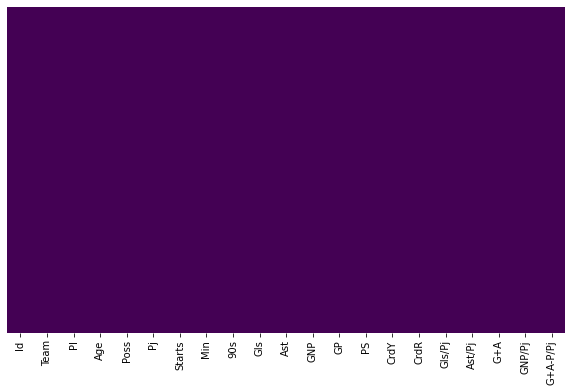

In [18]:
fn.check_nan(team)

In [19]:
fn.check_value(team, team.columns) 

0     1
31    1
23    1
24    1
25    1
Name: Id, dtype: int64
Almería        1
Levante        1
Burgos         1
Cartagena      1
CD Mirandés    1
Name: Team, dtype: int64
26    9
25    8
23    5
27    5
24    5
Name: Pl, dtype: int64
26.6    3
28.4    3
27.8    3
27.1    2
27.7    2
Name: Age, dtype: int64
58.0    2
43.4    2
51.9    2
45.1    1
52.2    1
Name: Poss, dtype: int64
20    22
14    20
Name: Pj, dtype: int64
220    22
154    20
Name: Starts, dtype: int64
1800    22
1260    20
Name: Min, dtype: int64
20.0    22
14.0    20
Name: 90s, dtype: int64
23    6
16    5
22    5
13    4
14    3
Name: Gls, dtype: int64
16    7
9     6
12    4
13    4
7     3
Name: Ast, dtype: int64
21    4
20    4
13    4
12    4
18    4
Name: GNP, dtype: int64
2    12
0     9
1     8
3     6
4     6
Name: GP, dtype: int64
2    11
3     8
1     8
5     5
0     4
Name: PS, dtype: int64
48    4
46    4
47    2
32    2
52    2
Name: CrdY, dtype: int64
3    10
4    10
1     7
2     7
5     3
Name: CrdR, 

In [20]:
fn.check_unique(team, team.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
['Almería' 'Athletic Club' 'Atlético Madrid' 'Barcelona' 'Betis' 'Cádiz'
 'Celta Vigo' 'Elche' 'Espanyol' 'Getafe' 'Girona' 'Mallorca' 'Osasuna'
 'Rayo Vallecano' 'Real Madrid' 'Real Sociedad' 'Sevilla' 'Valencia'
 'Valladolid' 'Villarreal' 'Alavés' 'Albacete' 'Andorra' 'Burgos'
 'Cartagena' 'CD Mirandés' 'Eibar' 'Granada' 'Huesca' 'Las Palmas'
 'Leganés' 'Levante' 'Lugo' 'Málaga' 'Oviedo' 'Ponferradina' 'Racing Sant'
 'Sporting Gijón' 'Tenerife' 'UD Ibiza' 'Villarreal B' 'Zaragoza']
[26 25 23 27 21 24 22 28 31 29]
[26.6 28.  29.1 28.9 29.4 27.8 28.3 28.2 28.4 28.6 27.9 26.2 29.5 24.5
 29.  26.8 27.1 25.7 27.3 31.  24.1 28.8 26.5 27.7 27.6 30.1 27.  28.5
 26.7 22.4]
[45.1 52.4 49.8 64.3 50.1 40.6 51.5 43.4 42.5 39.  52.7 41.2 46.1 53.9
 58.  56.  54.4 48.2 52.8 44.1 49.  66.4 41.7 53.3 49.1 54.6 55.7 41.6
 65.  52.2 52.3 41.8 51.9 40.9 45.7 47.  47.1 51.4 55.

In [21]:
team.Team.unique()

array(['Almería', 'Athletic Club', 'Atlético Madrid', 'Barcelona',
       'Betis', 'Cádiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe',
       'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
       'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal',
       'Alavés', 'Albacete', 'Andorra', 'Burgos', 'Cartagena',
       'CD Mirandés', 'Eibar', 'Granada', 'Huesca', 'Las Palmas',
       'Leganés', 'Levante', 'Lugo', 'Málaga', 'Oviedo', 'Ponferradina',
       'Racing Sant', 'Sporting Gijón', 'Tenerife', 'UD Ibiza',
       'Villarreal B', 'Zaragoza'], dtype=object)

In [22]:
lista = []
for x in team.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
team.Team = lista
team.Team.unique()

array(['Almeria', 'Athletic Club', 'Atletico Madrid', 'Barcelona',
       'Betis', 'Cadiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe',
       'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
       'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal',
       'Alaves', 'Albacete', 'Andorra', 'Burgos', 'Cartagena',
       'CD Mirandes', 'Eibar', 'Granada', 'Huesca', 'Las Palmas',
       'Leganes', 'Levante', 'Lugo', 'Malaga', 'Oviedo', 'Ponferradina',
       'Racing Sant', 'Sporting Gijon', 'Tenerife', 'UD Ibiza',
       'Villarreal B', 'Zaragoza'], dtype=object)

In [23]:
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Real Betis',
       'FC Penger', 'Ninguno', 'Athletic de bilbao', 'Valencia',
       'Sevilla', 'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'las Palmas', 'Murcia', 'Oviedo', 'Málaga',
       'Hércules', 'Sporting de Gijón', 'Celta de Vigo', 'Valladolid',
       'Levante', 'Cádiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing de Santander', 'Recreativo', 'Almería',
       'Córdoba', 'Xerez', 'Alavés', 'Granada', 'Albacete', 'Getafe',
       'Salamanca CF', 'Linense', 'UD Logroñés Logroño', 'Badajoz',
       'Cartagena', 'Mérida', 'Gimnàstic', 'Rayo Vallecano', 'Castellón',
       'Móstoles', 'Lleida Esportiu', 'Almería (rugby)', 'Girona',
       'Cultural Leonesa', 'Burgos Real Burgos', 'Jaén', 'Leganés',
       'Cisneros (rugby)', 'Racing Ferrol', 'Compostela', 'Sabadell',
       'Extremadura', 'Terrassa', 'Tudelano', 'Atletismo', 'Pontevedra',
       'Melilla', 'Linares',
    

In [24]:
lista = []
for x in estadio.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
estadio.Team = lista
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Real Betis',
       'FC Penger', 'Ninguno', 'Athletic de bilbao', 'Valencia',
       'Sevilla', 'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'las Palmas', 'Murcia', 'Oviedo', 'Malaga',
       'Hercules', 'Sporting de Gijon', 'Celta de Vigo', 'Valladolid',
       'Levante', 'Cadiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing de Santander', 'Recreativo', 'Almeria',
       'Cordoba', 'Xerez', 'Alaves', 'Granada', 'Albacete', 'Getafe',
       'Salamanca CF', 'Linense', 'UD Logroñes Logroño', 'Badajoz',
       'Cartagena', 'Merida', 'Gimnàstic', 'Rayo Vallecano', 'Castellon',
       'Mostoles', 'Lleida Esportiu', 'Almeria (rugby)', 'Girona',
       'Cultural Leonesa', 'Burgos Real Burgos', 'Jaen', 'Leganes',
       'Cisneros (rugby)', 'Racing Ferrol', 'Compostela', 'Sabadell',
       'Extremadura', 'Terrassa', 'Tudelano', 'Atletismo', 'Pontevedra',
       'Melilla', 'Linares',
    

In [25]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Betis',
 'Celta Vigo',
 'Andorra',
 'Burgos',
 'CD Mirandes',
 'Eibar',
 'Huesca',
 'Las Palmas',
 'Lugo',
 'Ponferradina',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza',
 'Villarreal B']

In [26]:
lista = []
for x in estadio.Team:
    x = x.replace('Athletic de bilbao','Athletic Club').replace('Real Betis', 'Betis').replace('Celta de Vigo', 'Celta Vigo')
    x = x.replace('Burgos Real Burgos', 'Burgos').replace('las Palmas', 'Las Palmas').replace('Racing de Santander', 'Racing Sant')
    x = x.replace('Sporting de Gijon', 'Sporting Gijon')
    lista.append(x)
estadio.Team = lista
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Betis',
       'FC Penger', 'Ninguno', 'Athletic Club', 'Valencia', 'Sevilla',
       'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'Las Palmas', 'Murcia', 'Oviedo', 'Malaga',
       'Hercules', 'Sporting Gijon', 'Celta Vigo', 'Valladolid',
       'Levante', 'Cadiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing Sant', 'Recreativo', 'Almeria', 'Cordoba',
       'Xerez', 'Alaves', 'Granada', 'Albacete', 'Getafe', 'Salamanca CF',
       'Linense', 'UD Logroñes Logroño', 'Badajoz', 'Cartagena', 'Merida',
       'Gimnàstic', 'Rayo Vallecano', 'Castellon', 'Mostoles',
       'Lleida Esportiu', 'Almeria (rugby)', 'Girona', 'Cultural Leonesa',
       'Burgos', 'Jaen', 'Leganes', 'Cisneros (rugby)', 'Racing Ferrol',
       'Compostela', 'Sabadell', 'Extremadura', 'Terrassa', 'Tudelano',
       'Atletismo', 'Pontevedra', 'Melilla', 'Linares',
       'Marineros de Gijon (futbol americano) C

In [27]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

['Andorra',
 'CD Mirandes',
 'Eibar',
 'Huesca',
 'Lugo',
 'Ponferradina',
 'UD Ibiza',
 'Villarreal B']

In [28]:
filas = [{'Id': 66, 'Stadium': 'Estadio Nacional', 'Capacity':3306, 'Team': 'Andorra'},
         {'Id': 67, 'Stadium': 'Estadio Municipal de Anduva', 'Capacity':5759, 'Team': 'CD Mirandes'},
         {'Id': 68, 'Stadium': 'Estadio Municipal de Ipurúa', 'Capacity':8164, 'Team': 'Eibar'},
         {'Id': 69, 'Stadium': 'El Alcoraz', 'Capacity':9100, 'Team': 'Huesca'},
         {'Id': 70, 'Stadium': 'Estadio Ángel Carro', 'Capacity':7114, 'Team': 'Lugo'},
         {'Id': 71, 'Stadium': 'Estadio Municipal El Toralín', 'Capacity':8400, 'Team': 'Ponferradina'},
         {'Id': 72, 'Stadium': 'Estadio Palladium Can Misses', 'Capacity':6000, 'Team': 'UD Ibiza'},
         {'Id': 73, 'Stadium': 'Ciudad Deportiva del Villarreal', 'Capacity':5000, 'Team': 'Villarreal B'}]
estadio = estadio.append(filas, ignore_index=True)
estadio.tail()

,Id,Stadium,Capacity,Team
69,69,El Alcoraz,9100,Huesca
70,70,Estadio Ángel Carro,7114,Lugo
71,71,Estadio Municipal El Toralín,8400,Ponferradina
72,72,Estadio Palladium Can Misses,6000,UD Ibiza
73,73,Ciudad Deportiva del Villarreal,5000,Villarreal B


In [29]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [30]:
estadio.Team

0           Barcelona
1         Real Madrid
2     Atletico Madrid
3               Betis
4           FC Penger
           ...       
69             Huesca
70               Lugo
71       Ponferradina
72           UD Ibiza
73       Villarreal B
Name: Team, Length: 74, dtype: object

In [31]:
lista = []
for x in team.Team:
    for pos, i in enumerate(estadio.Team):
        if x == i:
            lista.append(pos)
        else:
            continue
team["Id_Stadium"] = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Stadium
0,0,Almeria,26,26.6,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00,30
1,1,Athletic Club,25,28.0,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71,6
2,2,Atletico Madrid,23,29.1,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57,2
3,3,Barcelona,25,26.6,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00,0
4,4,Betis,27,28.9,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57,3


### LIMPIAMOS PLAYERS

In [32]:
player.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-047,1991.0,10.0,7.0,551,6.1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-227,1996.0,13.0,8.0,747,8.3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-076,1995.0,14.0,14.0,"1,260",14.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-363,1997.0,14.0,14.0,"1,260",14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-359,1997.0,6.0,2.0,238,2.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00


In [33]:
player.columns = ['Id', 'Player', 'Nation', 'Pos', 'Team', 'Age', 'Born', 'Pj',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY',
       'CrdR', 'Gls/Pj', 'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [34]:
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1105,1105,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-347,1994.0,19.0,15.0,"1,297",14.4,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0.14,0.14,0.28,0.07,0.21
1106,1106,Luca Zidane,fr FRA,GK,Eibar,24-215,1998.0,9.0,9.0,810,9.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1107,1107,Elady Zorrilla,es ESP,"MF,FW",Tenerife,32-154,1990.0,7.0,2.0,308,3.4,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.58,0.00,0.58,0.00,0.00
1108,1108,Loren Zúñiga,es ESP,FW,Málaga,19-330,2003.0,13.0,2.0,364,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
1109,1109,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-287,1994.0,18.0,13.0,"1,161",12.9,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.16,0.08,0.23,0.16,0.23


'N nan cols: 22'

Player      3.693694
Nation      4.054054
Pos         3.693694
Team        3.693694
Age         3.963964
Born        3.963964
Pj          3.693694
Starts      3.693694
Min         3.693694
90s         3.693694
Gls         3.693694
Ast         3.693694
GNP         3.693694
GP          3.693694
PS          3.693694
CrdY        3.693694
CrdR        3.693694
Gls/Pj      3.693694
Ast/Pj      3.693694
G+A         3.693694
GNP/Pj      3.693694
G+A-P/Pj    3.693694
dtype: float64

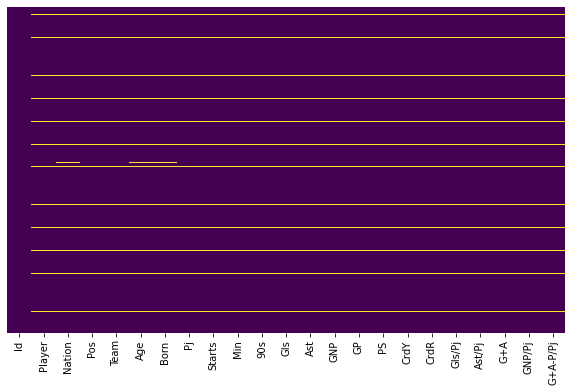

In [35]:
fn.check_nan(player)

In [36]:
player.dropna(inplace = True)
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-047,1991.0,10.0,7.0,551,6.1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-227,1996.0,13.0,8.0,747,8.3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-076,1995.0,14.0,14.0,"1,260",14.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-363,1997.0,14.0,14.0,"1,260",14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-359,1997.0,6.0,2.0,238,2.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00


'N nan cols: 0'

Series([], dtype: float64)

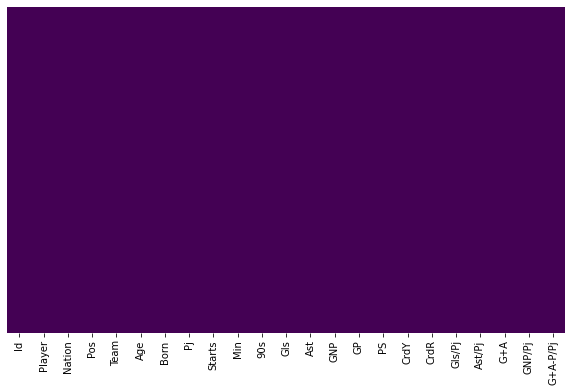

In [37]:
fn.check_nan(player)

In [38]:
lista = []
for x in range(len(player)):
    lista.append(x)
player.Id = lista
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1105,1060,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-347,1994.0,19.0,15.0,"1,297",14.4,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0.14,0.14,0.28,0.07,0.21
1106,1061,Luca Zidane,fr FRA,GK,Eibar,24-215,1998.0,9.0,9.0,810,9.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1107,1062,Elady Zorrilla,es ESP,"MF,FW",Tenerife,32-154,1990.0,7.0,2.0,308,3.4,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.58,0.00,0.58,0.00,0.00
1108,1063,Loren Zúñiga,es ESP,FW,Málaga,19-330,2003.0,13.0,2.0,364,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
1109,1064,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-287,1994.0,18.0,13.0,"1,161",12.9,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.16,0.08,0.23,0.16,0.23


In [39]:
player.reset_index(drop=True, inplace=True)
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1060,1060,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-347,1994.0,19.0,15.0,"1,297",14.4,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0.14,0.14,0.28,0.07,0.21
1061,1061,Luca Zidane,fr FRA,GK,Eibar,24-215,1998.0,9.0,9.0,810,9.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1062,1062,Elady Zorrilla,es ESP,"MF,FW",Tenerife,32-154,1990.0,7.0,2.0,308,3.4,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.58,0.00,0.58,0.00,0.00
1063,1063,Loren Zúñiga,es ESP,FW,Málaga,19-330,2003.0,13.0,2.0,364,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
1064,1064,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-287,1994.0,18.0,13.0,"1,161",12.9,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.16,0.08,0.23,0.16,0.23


In [40]:
player.info(memory_usage='deep') # Pj, Starts, Born, Gls, Ast, GNP, GP, PS, CrdY, CrdR sin floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1065 non-null   int64  
 1   Player    1065 non-null   object 
 2   Nation    1065 non-null   object 
 3   Pos       1065 non-null   object 
 4   Team      1065 non-null   object 
 5   Age       1065 non-null   object 
 6   Born      1065 non-null   float64
 7   Pj        1065 non-null   float64
 8   Starts    1065 non-null   float64
 9   Min       1065 non-null   object 
 10  90s       1065 non-null   float64
 11  Gls       1065 non-null   float64
 12  Ast       1065 non-null   float64
 13  GNP       1065 non-null   float64
 14  GP        1065 non-null   float64
 15  PS        1065 non-null   float64
 16  CrdY      1065 non-null   float64
 17  CrdR      1065 non-null   float64
 18  Gls/Pj    1065 non-null   float64
 19  Ast/Pj    1065 non-null   float64
 20  G+A       1065 non-null   floa

In [41]:
lista = ['Pj', 'Starts', 'Born', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR']
for x in lista:
    temp = []
    for i in player[x]:
        i = int(i)
        temp.append(i)
    player[x] = temp
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-047,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-227,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-076,1995,14,14,"1,260",14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-363,1997,14,14,"1,260",14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-359,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00


In [42]:
lista= []
for x in player.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
player.Min = lista
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-047,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-227,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-076,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-363,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-359,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00


In [43]:
player.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1065 non-null   int64  
 1   Player    1065 non-null   object 
 2   Nation    1065 non-null   object 
 3   Pos       1065 non-null   object 
 4   Team      1065 non-null   object 
 5   Age       1065 non-null   object 
 6   Born      1065 non-null   int64  
 7   Pj        1065 non-null   int64  
 8   Starts    1065 non-null   int64  
 9   Min       1065 non-null   int64  
 10  90s       1065 non-null   float64
 11  Gls       1065 non-null   int64  
 12  Ast       1065 non-null   int64  
 13  GNP       1065 non-null   int64  
 14  GP        1065 non-null   int64  
 15  PS        1065 non-null   int64  
 16  CrdY      1065 non-null   int64  
 17  CrdR      1065 non-null   int64  
 18  Gls/Pj    1065 non-null   float64
 19  Ast/Pj    1065 non-null   float64
 20  G+A       1065 non-null   floa

In [44]:
player.Team.unique()

array(['Sevilla', 'Valladolid', 'Celta Vigo', 'Almería', 'Betis',
       'Real Madrid', 'Cádiz', 'Barcelona', 'Villarreal', 'Getafe',
       'Elche', 'Real Sociedad', 'Valencia', 'Athletic Club', 'Mallorca',
       'Osasuna', 'Rayo Vallecano', 'Espanyol', 'Atlético Madrid',
       'Girona', 'Málaga', 'Ponferradina', 'Oviedo', 'Alavés', 'Andorra',
       'Racing Sant', 'Eibar', 'Lugo', 'Cartagena', 'Tenerife',
       'Albacete', 'Zaragoza', 'Villarreal B', 'Las Palmas', 'Burgos',
       'Huesca', 'Sporting Gijón', 'Granada', 'UD Ibiza', 'Leganés',
       'CD Mirandés', 'Levante'], dtype=object)

In [45]:
lista = []
for x in player.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
player.Team = lista
player.Team.unique()

array(['Sevilla', 'Valladolid', 'Celta Vigo', 'Almeria', 'Betis',
       'Real Madrid', 'Cadiz', 'Barcelona', 'Villarreal', 'Getafe',
       'Elche', 'Real Sociedad', 'Valencia', 'Athletic Club', 'Mallorca',
       'Osasuna', 'Rayo Vallecano', 'Espanyol', 'Atletico Madrid',
       'Girona', 'Malaga', 'Ponferradina', 'Oviedo', 'Alaves', 'Andorra',
       'Racing Sant', 'Eibar', 'Lugo', 'Cartagena', 'Tenerife',
       'Albacete', 'Zaragoza', 'Villarreal B', 'Las Palmas', 'Burgos',
       'Huesca', 'Sporting Gijon', 'Granada', 'UD Ibiza', 'Leganes',
       'CD Mirandes', 'Levante'], dtype=object)

In [46]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in player.Team.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [47]:
lista = []
for x in player.Nation:
    x = x.split(' ')
    lista.append(x[1])
player.Nation = lista
player.Nation.unique()

array(['ARG', 'ESP', 'GHA', 'CIV', 'AUT', 'CHI', 'PAR', 'FRA', 'POR',
       'URU', 'SEN', 'MAR', 'GAB', 'SRB', 'ALB', 'BRA', 'CPV', 'MLI',
       'COD', 'DEN', 'CRO', 'BEL', 'NGA', 'SUI', 'MEX', 'GUI', 'MKD',
       'TOG', 'COL', 'ITA', 'NED', 'EQG', 'VEN', 'SWE', 'KOR', 'CAN',
       'CTA', 'GER', 'JPN', 'USA', 'POL', 'HON', 'UKR', 'AUS', 'MTQ',
       'GEO', 'MOZ', 'ALG', 'DOM', 'KVX', 'SVN', 'TUR', 'ECU', 'MNE',
       'NOR', 'PER', 'SVK', 'ISR', 'IRN', 'GRE', 'AND', 'ROU', 'ENG',
       'SLE', 'GNB', 'BOL', 'CMR', 'MTN', 'RUS', 'GAM', 'BHU'],
      dtype=object)

In [48]:
lista = []
for x in player.Age:
    x = x.split('-')
    lista.append(x[0])
player.Age = lista
player.Age.unique()

array(['31', '26', '27', '24', '30', '23', '33', '37', '25', '20', '18',
       '22', '28', '19', '35', '21', '34', '32', '17', '39', '29', '36',
       '41', '38', '40'], dtype=object)

In [49]:
lista = []
for x in player.Team:
    for pos, i in enumerate(team.Team):
        if x == i:
            lista.append(pos)
        else:
            continue
player["Id_Team"] = lista
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Team
0,0,Marcos Acuña,ARG,DF,Sevilla,31,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00,16
1,1,Álvaro Aguado,ESP,MF,Valladolid,26,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24,18
2,2,Joseph Aidoo,GHA,DF,Celta Vigo,27,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07,6
3,3,Sergio Akieme,ESP,DF,Almeria,24,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0
4,4,Paul Akouokou,CIV,MF,Betis,24,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,4


In [50]:
player.head(10)

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Team
0,0,Marcos Acuña,ARG,DF,Sevilla,31,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00,16
1,1,Álvaro Aguado,ESP,MF,Valladolid,26,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24,18
2,2,Joseph Aidoo,GHA,DF,Celta Vigo,27,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07,6
3,3,Sergio Akieme,ESP,DF,Almeria,24,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0
4,4,Paul Akouokou,CIV,MF,Betis,24,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,4
5,5,David Alaba,AUT,DF,Real Madrid,30,1992,14,13,1165,12.9,1,3,1,0,0,3,0,0.08,0.23,0.31,0.08,0.31,14
6,6,Tomás Alarcón,CHI,MF,Cadiz,23,1999,4,2,223,2.5,0,0,0,0,0,2,1,0.00,0.00,0.00,0.00,0.00,5
7,7,Jordi Alba,ESP,DF,Barcelona,33,1989,10,7,682,7.6,0,1,0,0,0,2,0,0.00,0.13,0.13,0.00,0.13,3
8,8,Raúl Albiol,ESP,DF,Villarreal,37,1985,13,13,1159,12.9,0,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,19
9,9,Rubén Alcaraz,ESP,MF,Cadiz,31,1991,10,5,513,5.7,0,0,0,0,0,5,1,0.00,0.00,0.00,0.00,0.00,5


In [52]:
links = []
for x in player.Player:
    if x == 'Marcos Acuña':
        links.append('https://assets.laliga.com/squad/2022/t179/p169813/2048x2225/p169813_t179_2022_0_001_000.png')
    elif x == 'Álvaro Aguado':
        links.append('https://assets.laliga.com/squad/2022/t192/p442291/2048x2225/p442291_t192_2022_0_001_000.png')
    elif x == 'Joseph Aidoo':
        links.append('https://assets.laliga.com/squad/2022/t176/p210171/2048x2225/p210171_t176_2022_0_001_000.png')
    elif x == 'Sergio Akieme':
        links.append('https://assets.laliga.com/squad/2022/t1564/p220871/2048x2048/p220871_t1564_2022_0_003_000.png')
    elif x == 'Paul Akouokou':
        links.append('https://assets.laliga.com/squad/2022/t185/p475177/2048x2225/p475177_t185_2022_0_001_000.png')
    elif x == 'David Alaba':
        links.append('https://assets.laliga.com/squad/2022/t186/p50188/2048x2225/p50188_t186_2022_0_001_000.png')
    elif x == 'Tomás Alarcón':
        links.append('https://assets.laliga.com/squad/2022/t1737/p229357/2048x2048/p229357_t1737_2022_0_002_000.jpg')
    elif x == 'Jordi Alba':
        links.append('https://assets.laliga.com/squad/2022/t178/p52356/1024x1113/p52356_t178_2022_0_001_000.png')
    elif x == 'Raúl Albiol':
        links.append('https://assets.laliga.com/squad/2022/t449/p18003/2048x2225/p18003_t449_2022_0_001_000.png')
    elif x == 'Rubén Alcaraz':
        links.append('https://assets.laliga.com/squad/2022/t1737/p96771/2048x2225/p96771_t1737_2022_0_001_000.png')
    else:
        links.append('https://cdn.sofifa.net/players/notfound_0_60.png')
links[:10]

['https://assets.laliga.com/squad/2022/t179/p169813/2048x2225/p169813_t179_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t192/p442291/2048x2225/p442291_t192_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t176/p210171/2048x2225/p210171_t176_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t1564/p220871/2048x2048/p220871_t1564_2022_0_003_000.png',
 'https://assets.laliga.com/squad/2022/t185/p475177/2048x2225/p475177_t185_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t186/p50188/2048x2225/p50188_t186_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t1737/p229357/2048x2048/p229357_t1737_2022_0_002_000.jpg',
 'https://assets.laliga.com/squad/2022/t178/p52356/1024x1113/p52356_t178_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t449/p18003/2048x2225/p18003_t449_2022_0_001_000.png',
 'https://assets.laliga.com/squad/2022/t1737/p96771/2048x2225/p96771_t1737_2022_0_001_000.png']

In [53]:
player['foto'] = links
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Team,foto
0,0,Marcos Acuña,ARG,DF,Sevilla,31,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00,16,https://assets.laliga.com/squad/2022/t179/p169...
1,1,Álvaro Aguado,ESP,MF,Valladolid,26,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24,18,https://assets.laliga.com/squad/2022/t192/p442...
2,2,Joseph Aidoo,GHA,DF,Celta Vigo,27,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07,6,https://assets.laliga.com/squad/2022/t176/p210...
3,3,Sergio Akieme,ESP,DF,Almeria,24,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0,https://assets.laliga.com/squad/2022/t1564/p22...
4,4,Paul Akouokou,CIV,MF,Betis,24,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,4,https://assets.laliga.com/squad/2022/t185/p475...


### LIMPIAMOS MATCHES

In [54]:
match.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,0,SP1,12/08/2022,20:00,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40,3.20,3.05,2.45,3.38,3.10,2.48,3.20,3.0,2.40,3.25,3.10,2.40,3.41,3.24,2.49,3.28,3.08,2.43,2.62,1.50,2.55,1.57,2.62,1.60,2.50,1.54,0.25,1.83,2.07,1.85,2.09,1.87,2.09,1.82,2.04,3.10,3.1,2.55,3.10,2.95,2.50,3.15,3.05,2.45,3.19,3.06,2.63,3.25,2.90,2.45,3.10,3.0,2.55,3.52,3.14,2.66,3.20,3.04,2.50,2.62,1.50,2.63,1.54,2.69,1.57,2.55,1.52,0.25,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,13/08/2022,16:00,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33,1.83,3.55,4.60,1.81,3.75,4.87,1.83,3.5,4.33,1.75,3.50,4.50,1.90,3.77,4.90,1.83,3.68,4.50,2.00,1.80,2.10,1.81,2.13,1.87,2.04,1.80,-0.50,1.77,2.02,1.80,2.13,1.86,2.13,1.81,2.05,1.72,3.6,4.75,1.75,3.50,5.00,1.77,3.50,5.00,1.78,3.62,5.39,1.75,3.50,5.00,1.75,3.6,5.00,1.84,3.73,5.39,1.78,3.58,5.00,2.20,1.66,2.24,1.71,2.26,1.83,2.19,1.70,-0.75,2.00,1.90,2.02,1.91,2.06,1.93,2.01,1.86,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,13/08/2022,18:00,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95,3.85,3.60,1.95,4.05,3.78,1.95,3.90,3.5,1.95,3.80,3.50,1.90,4.10,3.80,2.00,3.93,3.66,1.94,1.99,1.91,2.00,1.91,2.00,1.92,1.95,1.87,0.50,1.95,1.95,1.97,1.95,1.97,1.98,1.93,1.93,3.30,3.4,2.20,4.00,3.40,1.95,3.35,3.35,2.20,3.54,3.44,2.23,3.50,3.25,2.15,3.40,3.4,2.20,3.66,3.47,2.25,3.45,3.39,2.19,2.00,1.80,2.09,1.81,2.14,1.90,2.05,1.79,0.25,2.02,1.88,2.02,1.91,2.03,1.91,1.98,1.88,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,13/08/2022,20:00,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50,1.22,6.75,13.00,1.22,6.83,15.00,1.18,6.5,17.00,1.18,6.50,13.00,1.24,7.40,17.00,1.21,6.79,14.20,1.53,2.50,1.55,2.57,1.55,2.73,1.50,2.58,-2.00,2.09,1.81,2.15,1.78,2.16,1.88,2.04,1.83,1.22,6.5,12.00,1.25,6.25,11.00,1.22,6.50,12.00,1.24,6.80,13.50,1.20,6.50,15.00,1.20,7.0,13.00,1.25,7.40,16.75,1.22,6.82,13.42,1.50,2.62,1.51,2.68,1.58,2.79,1.50,2.61,-1.75,1.82,2.08,1.83,2.08,1.86,2.14,1.82,2.06,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,14/08/2022,16:30,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20,3.45,3.20,2.20,3.62,3.29,2.26,3.40,3.2,2.20,3.50,3.13,2.15,3.75,3.33,2.26,3.55,3.24,2.20,2.37,1.57,2.50,1.59,2.50,1.65,2.38,1.59,0.25,1.99,1.91,2.00,1.93,2.05,1.93,1.98,1.87,3.80,3.0,2.15,3.70,3.00,2.20,3.65,3.05,2.25,4.03,3.08,2.22,3.90,3.00,2.15,3.75,3.1,2.20,4.05,3.18,2.25,3.80,3.07,2.20,2.62,1.50,2.74,1.51,2.75,1.55,2.

'N nan cols: 141'

Div              0.020440
Date             0.020440
Time            80.336581
HomeTeam         0.020440
AwayTeam         0.020440
                  ...    
SBD             60.039518
SBA             60.039518
Unnamed: 58    100.000000
Unnamed: 59    100.000000
Unnamed: 60    100.000000
Length: 141, dtype: float64

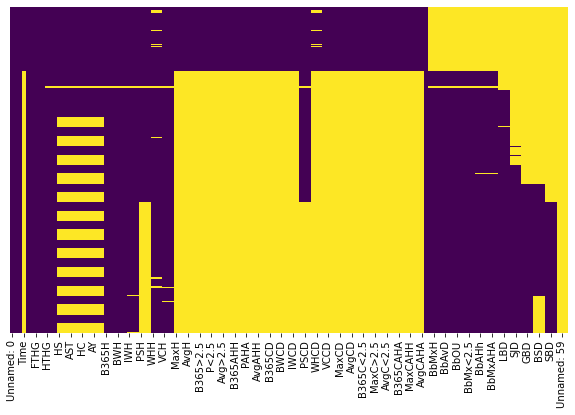

In [55]:
fn.check_nan(match)


'N nan cols: 138'

Div          0.020440
Date         0.020440
Time        80.336581
HomeTeam     0.020440
AwayTeam     0.020440
              ...    
BSD         65.619677
BSA         65.619677
SBH         60.039518
SBD         60.039518
SBA         60.039518
Length: 138, dtype: float64

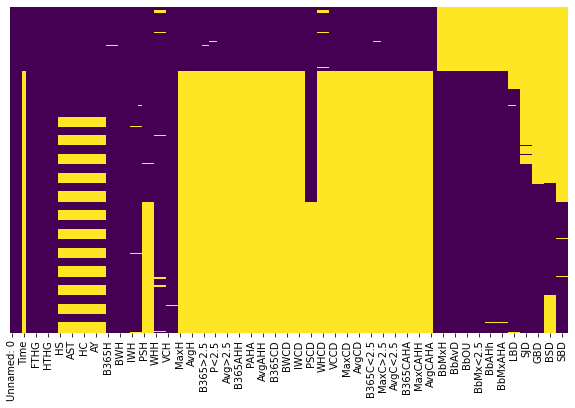

In [56]:
match.drop(['Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60'], axis=1, inplace = True)
fn.check_nan(match)

'N nan cols: 61'

Div          0.020440
Date         0.020440
HomeTeam     0.020440
AwayTeam     0.020440
FTHG         0.020440
              ...    
BSD         65.619677
BSA         65.619677
SBH         60.039518
SBD         60.039518
SBA         60.039518
Length: 61, dtype: float64

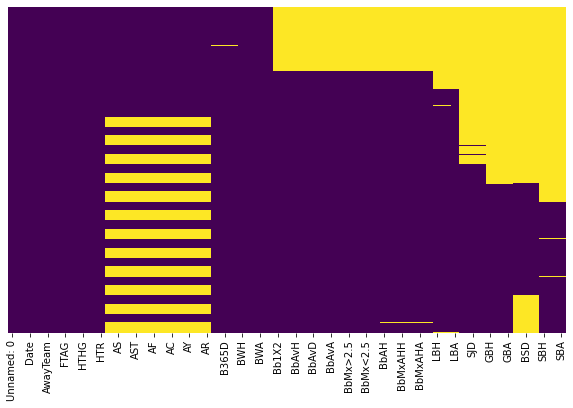

In [57]:
match.drop(['Time','IWH','IWD','IWA', 'PSH', 'PSD', 'PSA', 'WHH','WHD','WHA','VCH','VCD',
            'VCA', 'MaxH','MaxD','MaxA','AvgH','AvgD','AvgA', 'B365>2.5','B365<2.5', 
            'P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','AHh','B365AHH','B365AHA',
            'PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','B365CH','B365CD','B365CA', 
            'BWCH','BWCD','BWCA','IWCH','IWCD','IWCA','PSCH','PSCD','PSCA','WHCH','WHCD',
            'WHCA','VCCH','VCCD','VCCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA',
            'B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5',
            'AvgC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA',
            'AvgCAHH','AvgCAHA'], axis=1, inplace = True)
fn.check_nan(match)

In [58]:
match.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
14672,14672,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.75,3.75,1.85,2.85,4.35,56,22.0,2.10,2.03,2.92,2.78,4.00,3.71,5.0,1.98,1.97,1.86,1.86,6.0,-0.25,1.87,1.85,2.02,2.00,NaN,NaN,NaN,2.00,2.62,4.00,2.05,2.80,3.55,NaN,NaN,NaN,2.10,2.80,3.60
14673,14673,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,2.75,3.50,2.00,2.70,4.00,56,22.0,2.10,2.05,2.90,2.77,4.25,3.70,6.0,1.91,1.88,1.95,1.94,6.0,-0.25,1.81,1.80,2.05,2.05,NaN,NaN,NaN,2.10,2.75,3.50,2.05,2.75,3.60,NaN,NaN,NaN,2.10,2.80,3.60
14674,14674,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.87,3.60,1.95,2.85,3.85,56,22.0,2.00,1.95,3.10,2.87,4.33,3.88,5.0,1.91,1.88,1.95,1.94,6.0,-0.5,2.09,2.06,1.84,1.81,NaN,NaN,NaN,1.91,2.75,4.33,1.95,2.85,3.80,NaN,NaN,NaN,2.00,2.88,3.75
14675,14675,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.61,3.25,5.00,1.65,3.30,4.65,56,22.0,1.68,1.61,3.50,3.31,6.00,5.16,8.0,1.97,1.90,1.95,1.92,6.0,-0.75,1.77,1.77,2.11,2.09,NaN,NaN,NaN,1.50,3.50,6.00,1.60,3.30,5.00,NaN,NaN,NaN,1.62,3.20,5.50
14676,14676,SP2,18/06/06,Hercules,Recreativo,0.0,2.0,A,0.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75,2.75,2.50,2.85,2.70,2.50,56,20.0,3.00,2.81,3.00,2.78,2.60,2.47,5.0,1.85,1.84,2.00,1.99,4.0,0.0,2.10,2.09,1.78,1.76,NaN,NaN,NaN,2.75,3.00,2.38,2.80,2.75,2.45,NaN,NaN,NaN,3.00,2.75,2.40


'N nan cols: 7'

Bb1X2    19.895074
BbMxH    19.895074
BbAvH    19.895074
BbMxD    19.895074
BbAvD    19.895074
BbMxA    19.895074
BbAvA    19.895074
dtype: float64

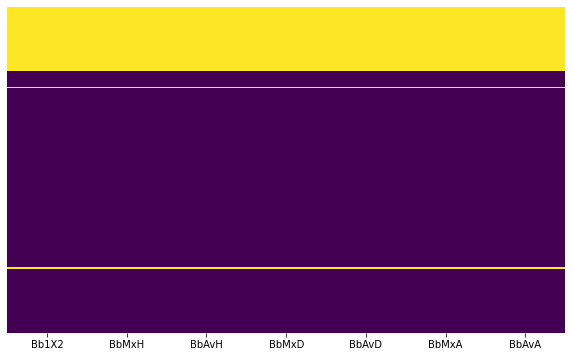

In [59]:
fn.check_nan(match[['Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA']])

'N nan cols: 28'

Div          0.020440
Date         0.020440
HomeTeam     0.020440
AwayTeam     0.020440
FTHG         0.020440
FTAG         0.020440
FTR          0.020440
HTHG         0.163521
HTAG         0.163521
HTR          0.163521
HS          37.936908
AS          37.936908
HST         37.936908
AST         37.936908
HF          37.936908
AF          37.936908
HC          37.936908
AC          37.936908
HY          37.936908
AY          37.936908
HR          37.936908
AR          37.936908
B365H        0.279349
B365D        0.279349
B365A        0.279349
BWH          0.476937
BWD          0.476937
BWA          0.476937
dtype: float64

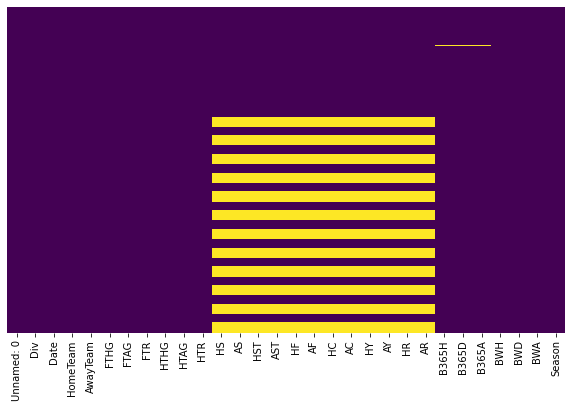

In [60]:
match.drop(['SBH','SBD','SBA','LBH','LBD','LBA','BSH','BSD','BSA','SJH','SJD','SJA',
            'GBH','GBD','GBA','BbAH','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA',
            'BbMx>2.5','BbAv>2.5','BbMx<2.5','BbAv<2.5','BbOU','Bb1X2','BbMxH','BbAvH',
            'BbMxD','BbAvD','BbMxA','BbAvA'], axis=1, inplace = True)
fn.check_nan(match)

In [61]:
match.isnull().sum()

Unnamed: 0       0
Div              3
Date             3
HomeTeam         3
AwayTeam         3
FTHG             3
FTAG             3
FTR              3
HTHG            24
HTAG            24
HTR             24
HS            5568
AS            5568
HST           5568
AST           5568
HF            5568
AF            5568
HC            5568
AC            5568
HY            5568
AY            5568
HR            5568
AR            5568
B365H           41
B365D           41
B365A           41
BWH             70
BWD             70
BWA             70
Season           0
dtype: int64

In [62]:
round(match['AR'].mean())

0

In [63]:
match['HS'].fillna(round(match['HS'].mean()), inplace=True)
match['AS'].fillna(round(match['AS'].mean()), inplace=True)
match['HST'].fillna(round(match['HST'].mean()), inplace=True)
match['AST'].fillna(round(match['AST'].mean()), inplace=True)
match['HF'].fillna(round(match['HF'].mean()), inplace=True)
match['AF'].fillna(round(match['AF'].mean()), inplace=True)
match['HC'].fillna(round(match['HC'].mean()), inplace=True)
match['AC'].fillna(round(match['AC'].mean()), inplace=True)
match['HY'].fillna(round(match['HY'].mean()), inplace=True)
match['AY'].fillna(round(match['AY'].mean()), inplace=True)
match['HR'].fillna(round(match['HR'].mean()), inplace=True)
match['AR'].fillna(round(match['AR'].mean()), inplace=True)
match.isnull().sum()

Unnamed: 0     0
Div            3
Date           3
HomeTeam       3
AwayTeam       3
FTHG           3
FTAG           3
FTR            3
HTHG          24
HTAG          24
HTR           24
HS             0
AS             0
HST            0
AST            0
HF             0
AF             0
HC             0
AC             0
HY             0
AY             0
HR             0
AR             0
B365H         41
B365D         41
B365A         41
BWH           70
BWD           70
BWA           70
Season         0
dtype: int64

In [64]:
for pos, x in enumerate(match['Div'].isnull()):
    #print(pos,x)
    if x == True:
        print(pos,x)
    else:
        continue

7938 True
8781 True
8782 True


In [65]:
match.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'Season'],
      dtype='object')

In [66]:
match[['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA']]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
0,0,SP1,12/08/2022,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40
1,1,SP1,13/08/2022,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33
2,2,SP1,13/08/2022,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95
3,3,SP1,13/08/2022,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50
4,4,SP1,14/08/2022,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14672,14672,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.75,3.75,1.85,2.85,4.35
14673,14673,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.10,2.75,3.50,2.00,2.70,4.00
14674,14674,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.87,3.60,1.95,2.85,3.85
14675,14675,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,1.61,3.25,5.00,1.65,3.30,4.65


In [67]:
match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2']

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
7938,7938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1314
8781,8781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1213
8782,8782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1213


In [68]:
n = list(match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2'].index)
n

[7938, 8781, 8782]

In [69]:
match.drop(index=n, inplace = True)
match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2']

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season


'N nan cols: 9'

HTHG     0.143110
HTAG     0.143110
HTR      0.143110
B365H    0.258961
B365D    0.258961
B365A    0.258961
BWH      0.456590
BWD      0.456590
BWA      0.456590
dtype: float64

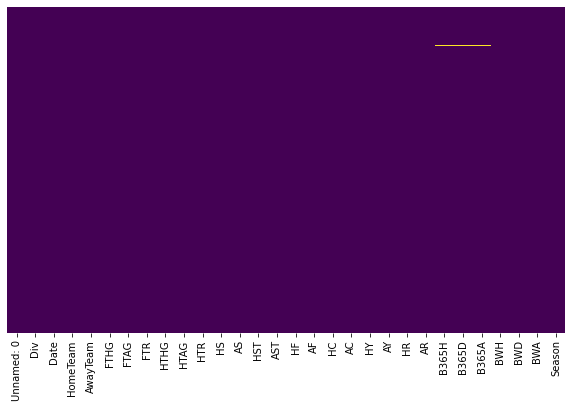

In [70]:
fn.check_nan(match)

In [71]:
nulos = []
for pos, x in enumerate(match['HTHG'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[3501,
 3514,
 3528,
 3533,
 3551,
 3559,
 3571,
 3581,
 3594,
 3601,
 3616,
 3627,
 3638,
 3641,
 3660,
 3662,
 3674,
 3693,
 3703,
 3709,
 3722]

In [72]:
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
3501,3501,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3514,3514,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3528,3528,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3533,3533,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3551,3551,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3559,3559,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3571,3571,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3581,3581,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3594,3594,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3601,3601,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819


In [73]:
match[['HTHG','HTAG']] = match[['HTHG','HTAG']].fillna(0.0)
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
3501,3501,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3514,3514,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3528,3528,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3533,3533,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3551,3551,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3559,3559,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3571,3571,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3581,3581,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3594,3594,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3601,3601,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819


In [74]:
match['HTR'] = match['HTR'].fillna('D')
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
3501,3501,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3514,3514,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3528,3528,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3533,3533,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3551,3551,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3559,3559,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3571,3571,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3581,3581,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3594,3594,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3601,3601,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819


'N nan cols: 6'

B365H    0.258961
B365D    0.258961
B365A    0.258961
BWH      0.456590
BWD      0.456590
BWA      0.456590
dtype: float64

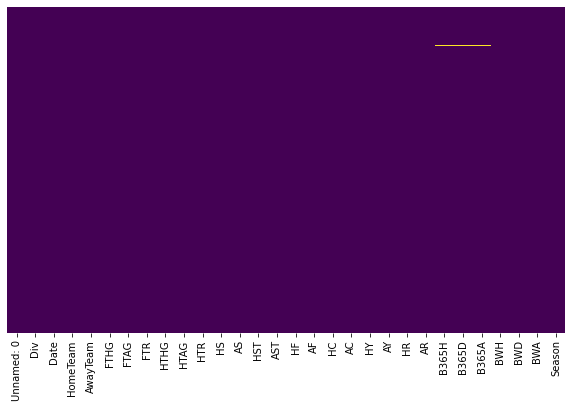

In [75]:
fn.check_nan(match)

In [76]:
nulos = []
for pos, x in enumerate(match['B365H'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[975,
 1069,
 1673,
 1721,
 1751,
 1752,
 1753,
 1754,
 1768,
 1936,
 2499,
 2856,
 3501,
 3514,
 3528,
 3533,
 3551,
 3559,
 3571,
 3581,
 3594,
 3601,
 3616,
 3627,
 3638,
 3641,
 3660,
 3662,
 3674,
 3693,
 3703,
 3709,
 3722,
 4121,
 8429,
 9473,
 9615,
 10444]

In [77]:
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
975,975,SP2,02/01/2022,Sp Gijon,Lugo,1.0,1.0,D,0.0,1.0,A,21.0,18.0,4.0,4.0,12.0,15.0,3.0,5.0,1.0,3.0,0.0,1.0,NaN,NaN,NaN,1.83,3.10,4.10,2122
1069,1069,SP2,07/03/2022,Sociedad B,Sp Gijon,2.0,1.0,H,1.0,0.0,H,15.0,12.0,5.0,2.0,7.0,17.0,6.0,3.0,3.0,4.0,0.0,0.0,NaN,NaN,NaN,2.60,2.85,2.70,2122
1673,1673,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021
1721,1721,SP2,23/11/2020,Albacete,Almeria,1.0,2.0,A,0.0,1.0,A,14.0,11.0,3.0,5.0,21.0,21.0,6.0,5.0,4.0,7.0,0.0,0.0,NaN,NaN,NaN,3.00,2.80,2.65,2021
1751,1751,SP2,03/12/2020,Almeria,Mallorca,0.0,1.0,A,0.0,0.0,D,10.0,12.0,2.0,3.0,11.0,18.0,4.0,5.0,4.0,3.0,0.0,0.0,NaN,NaN,NaN,2.60,2.95,2.85,2021
1752,1752,SP2,03/12/2020,Oviedo,Alcorcon,1.0,1.0,D,0.0,0.0,D,10.0,12.0,4.0,6.0,11.0,12.0,4.0,4.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,2.10,2.90,4.00,2021
1753,1753,SP2,03/12/2020,Tenerife,Sabadell,1.0,2.0,A,1.0,2.0,A,15.0,5.0,3.0,2.0,15.0,18.0,4.0,4.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,1.67,3.60,5.25,2021
1754,1754,SP2,03/12/2020,Sp Gijon,Albacete,0.0,0.0,D,0.0,0.0,D,15.0,5.0,5.0,1.0,15.0,20.0,4.0,2.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,1.80,3.00,5.50,2021
1768,1768,SP2,10/12/2020,Girona,Logrones,2.0,0.0,H,0.0,0.0,D,15.0,14.0,4.0,3.0,17.0,13.0,3.0,4.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,1.67,3.50,5.25,2021
1936,1936,SP2,04/04/2021,Sp Gijon,Mirandes,1.0,2.0,A,0.0,0.0,D,13.0,10.0,2.0,7.0,13.0,14.0,9.0,4.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,1.67,3.30,6.00,2021


In [78]:
match['B365H'] = match['B365H'].fillna(2.20)
match['B365D'] = match['B365D'].fillna(3.10)
match['B365A'] = match['B365A'].fillna(3.30)
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
975,975,SP2,02/01/2022,Sp Gijon,Lugo,1.0,1.0,D,0.0,1.0,A,21.0,18.0,4.0,4.0,12.0,15.0,3.0,5.0,1.0,3.0,0.0,1.0,2.2,3.1,3.3,1.83,3.10,4.10,2122
1069,1069,SP2,07/03/2022,Sociedad B,Sp Gijon,2.0,1.0,H,1.0,0.0,H,15.0,12.0,5.0,2.0,7.0,17.0,6.0,3.0,3.0,4.0,0.0,0.0,2.2,3.1,3.3,2.60,2.85,2.70,2122
1673,1673,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,2.2,3.1,3.3,NaN,NaN,NaN,2021
1721,1721,SP2,23/11/2020,Albacete,Almeria,1.0,2.0,A,0.0,1.0,A,14.0,11.0,3.0,5.0,21.0,21.0,6.0,5.0,4.0,7.0,0.0,0.0,2.2,3.1,3.3,3.00,2.80,2.65,2021
1751,1751,SP2,03/12/2020,Almeria,Mallorca,0.0,1.0,A,0.0,0.0,D,10.0,12.0,2.0,3.0,11.0,18.0,4.0,5.0,4.0,3.0,0.0,0.0,2.2,3.1,3.3,2.60,2.95,2.85,2021
1752,1752,SP2,03/12/2020,Oviedo,Alcorcon,1.0,1.0,D,0.0,0.0,D,10.0,12.0,4.0,6.0,11.0,12.0,4.0,4.0,5.0,1.0,0.0,0.0,2.2,3.1,3.3,2.10,2.90,4.00,2021
1753,1753,SP2,03/12/2020,Tenerife,Sabadell,1.0,2.0,A,1.0,2.0,A,15.0,5.0,3.0,2.0,15.0,18.0,4.0,4.0,5.0,1.0,0.0,0.0,2.2,3.1,3.3,1.67,3.60,5.25,2021
1754,1754,SP2,03/12/2020,Sp Gijon,Albacete,0.0,0.0,D,0.0,0.0,D,15.0,5.0,5.0,1.0,15.0,20.0,4.0,2.0,0.0,4.0,0.0,0.0,2.2,3.1,3.3,1.80,3.00,5.50,2021
1768,1768,SP2,10/12/2020,Girona,Logrones,2.0,0.0,H,0.0,0.0,D,15.0,14.0,4.0,3.0,17.0,13.0,3.0,4.0,3.0,1.0,0.0,0.0,2.2,3.1,3.3,1.67,3.50,5.25,2021
1936,1936,SP2,04/04/2021,Sp Gijon,Mirandes,1.0,2.0,A,0.0,0.0,D,13.0,10.0,2.0,7.0,13.0,14.0,9.0,4.0,2.0,2.0,0.0,0.0,2.2,3.1,3.3,1.67,3.30,6.00,2021


In [79]:
nulos = []
for pos, x in enumerate(match['BWH'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[866,
 873,
 893,
 903,
 1673,
 2498,
 2499,
 2856,
 2865,
 2871,
 3501,
 3514,
 3528,
 3533,
 3551,
 3559,
 3571,
 3581,
 3590,
 3594,
 3601,
 3616,
 3627,
 3638,
 3641,
 3660,
 3662,
 3674,
 3693,
 3703,
 3709,
 3718,
 3722,
 4211,
 4212,
 4213,
 4214,
 4215,
 4216,
 4560,
 4565,
 4566,
 4568,
 6245,
 6642,
 7034,
 7038,
 7068,
 7069,
 7071,
 7074,
 7078,
 7079,
 7082,
 7083,
 7084,
 7085,
 7094,
 7932,
 8680,
 8763,
 8775,
 8776,
 9615,
 13446,
 13609,
 13732]

In [80]:
match.iloc[nulos].head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
866,866,SP2,24/10/2021,Amorebieta,Sociedad B,1.0,2.0,A,0.0,1.0,A,12.0,11.0,3.0,4.0,10.0,10.0,6.0,4.0,1.0,2.0,0.0,0.0,2.60,3.0,2.90,NaN,NaN,NaN,2122
873,873,SP2,29/10/2021,Sociedad B,Las Palmas,0.0,1.0,A,0.0,1.0,A,9.0,6.0,0.0,2.0,18.0,9.0,8.0,6.0,1.0,1.0,0.0,0.0,2.60,3.1,2.87,NaN,NaN,NaN,2122
893,893,SP2,04/11/2021,Malaga,Sociedad B,2.0,1.0,H,2.0,1.0,H,8.0,13.0,4.0,2.0,19.0,6.0,4.0,4.0,1.0,2.0,0.0,0.0,1.72,3.4,5.25,NaN,NaN,NaN,2122
903,903,SP2,07/11/2021,Sociedad B,Ibiza,0.0,1.0,A,0.0,0.0,D,6.0,9.0,1.0,5.0,11.0,16.0,3.0,3.0,2.0,0.0,0.0,1.0,2.62,3.1,2.90,NaN,NaN,NaN,2122
1673,1673,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,2.20,3.1,3.30,NaN,NaN,NaN,2021


In [81]:
match['BWH'] = match['BWH'].fillna(2.20)
match['BWD'] = match['BWD'].fillna(3.10)
match['BWA'] = match['BWA'].fillna(3.30)
match.iloc[nulos].head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
866,866,SP2,24/10/2021,Amorebieta,Sociedad B,1.0,2.0,A,0.0,1.0,A,12.0,11.0,3.0,4.0,10.0,10.0,6.0,4.0,1.0,2.0,0.0,0.0,2.60,3.0,2.90,2.2,3.1,3.3,2122
873,873,SP2,29/10/2021,Sociedad B,Las Palmas,0.0,1.0,A,0.0,1.0,A,9.0,6.0,0.0,2.0,18.0,9.0,8.0,6.0,1.0,1.0,0.0,0.0,2.60,3.1,2.87,2.2,3.1,3.3,2122
893,893,SP2,04/11/2021,Malaga,Sociedad B,2.0,1.0,H,2.0,1.0,H,8.0,13.0,4.0,2.0,19.0,6.0,4.0,4.0,1.0,2.0,0.0,0.0,1.72,3.4,5.25,2.2,3.1,3.3,2122
903,903,SP2,07/11/2021,Sociedad B,Ibiza,0.0,1.0,A,0.0,0.0,D,6.0,9.0,1.0,5.0,11.0,16.0,3.0,3.0,2.0,0.0,0.0,1.0,2.62,3.1,2.90,2.2,3.1,3.3,2122
1673,1673,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,2.20,3.1,3.30,2.2,3.1,3.3,2021


'N nan cols: 0'

Series([], dtype: float64)

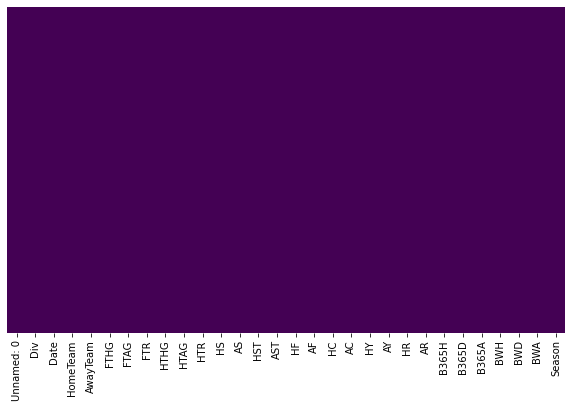

In [82]:
fn.check_nan(match)

In [83]:
match.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14672,14672,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.75,3.75,1.85,2.85,4.35,56
14673,14673,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.10,2.75,3.50,2.00,2.70,4.00,56
14674,14674,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.87,3.60,1.95,2.85,3.85,56
14675,14675,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,1.61,3.25,5.00,1.65,3.30,4.65,56
14676,14676,SP2,18/06/06,Hercules,Recreativo,0.0,2.0,A,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.75,2.75,2.50,2.85,2.70,2.50,56


In [84]:
match.columns = ['Id', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'Season']
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,12/08/2022,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,13/08/2022,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,13/08/2022,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,13/08/2022,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,14/08/2022,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [85]:
lista = ['FTHG', 'FTAG','HTHG', 'HTAG','HS', 'AS', 'HST', 'AST', 'HF', 'AF','HC', 'AC', 'HY', 'AY', 'HR', 'AR']
for x in lista:
    temp = []
    for i in match[x]:
        i = int(i)
        temp.append(i)
    match[x] = temp
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,12/08/2022,Osasuna,Sevilla,2,1,H,1,1,D,12,10,5,3,16,9,5,2,5,3,0,0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,13/08/2022,Celta,Espanol,2,2,D,1,0,H,8,10,3,2,17,15,3,3,5,2,0,0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,13/08/2022,Valladolid,Villarreal,0,3,A,0,0,D,12,10,6,4,6,10,4,5,1,0,0,0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,13/08/2022,Barcelona,Vallecano,0,0,D,0,0,D,21,4,6,2,16,14,8,0,3,6,1,0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,14/08/2022,Cadiz,Sociedad,0,1,A,0,1,A,7,15,2,7,9,20,3,6,4,2,0,0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [86]:
match.HomeTeam.unique()

array(['Osasuna', 'Celta', 'Valladolid', 'Barcelona', 'Cadiz', 'Valencia',
       'Almeria', 'Ath Bilbao', 'Getafe', 'Betis', 'Espanol', 'Sevilla',
       'Mallorca', 'Ath Madrid', 'Sociedad', 'Elche', 'Girona',
       'Vallecano', 'Real Madrid', 'Villarreal', 'Levante', 'Eibar',
       'Mirandes', 'Leganes', 'Las Palmas', 'Santander', 'Ibiza',
       'Burgos', 'Oviedo', 'Lugo', 'Cartagena', 'Villarreal B', 'Alaves',
       'Sp Gijon', 'Albacete', 'Zaragoza', 'Granada', 'Huesca',
       'Tenerife', 'Ponferradina', 'Malaga', 'Andorra', 'Sociedad B',
       'Fuenlabrada', 'Alcorcon', 'Amorebieta', 'Castellon', 'Logrones',
       'Sabadell', 'La Coruna', 'Numancia', 'Extremadura UD', 'Cordoba',
       'Gimnastic', 'Reus Deportiu', 'Rayo Majadahonda', 'Lorca',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'UCAM Murcia', 'Llagostera',
       'Ath Bilbao B', 'Recreativo', 'Hercules', 'Jaen', 'Murcia',
       'Real Madrid B', 'Xerez', 'Guadalajara', 'Alcoyano', 'Salamanca',
       'Real Union

In [87]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.HomeTeam.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Atletico Madrid',
 'Celta Vigo',
 'Espanyol',
 'Rayo Vallecano',
 'Real Sociedad',
 'CD Mirandes',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza']

In [88]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.AwayTeam.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Atletico Madrid',
 'Celta Vigo',
 'Espanyol',
 'Rayo Vallecano',
 'Real Sociedad',
 'CD Mirandes',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza']

In [89]:
match.HomeTeam.unique()

array(['Osasuna', 'Celta', 'Valladolid', 'Barcelona', 'Cadiz', 'Valencia',
       'Almeria', 'Ath Bilbao', 'Getafe', 'Betis', 'Espanol', 'Sevilla',
       'Mallorca', 'Ath Madrid', 'Sociedad', 'Elche', 'Girona',
       'Vallecano', 'Real Madrid', 'Villarreal', 'Levante', 'Eibar',
       'Mirandes', 'Leganes', 'Las Palmas', 'Santander', 'Ibiza',
       'Burgos', 'Oviedo', 'Lugo', 'Cartagena', 'Villarreal B', 'Alaves',
       'Sp Gijon', 'Albacete', 'Zaragoza', 'Granada', 'Huesca',
       'Tenerife', 'Ponferradina', 'Malaga', 'Andorra', 'Sociedad B',
       'Fuenlabrada', 'Alcorcon', 'Amorebieta', 'Castellon', 'Logrones',
       'Sabadell', 'La Coruna', 'Numancia', 'Extremadura UD', 'Cordoba',
       'Gimnastic', 'Reus Deportiu', 'Rayo Majadahonda', 'Lorca',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'UCAM Murcia', 'Llagostera',
       'Ath Bilbao B', 'Recreativo', 'Hercules', 'Jaen', 'Murcia',
       'Real Madrid B', 'Xerez', 'Guadalajara', 'Alcoyano', 'Salamanca',
       'Real Union

In [90]:
lista = []
for x in match.HomeTeam:
    x = x.replace('Ath Bilbao','Athletic Club').replace('Ath Madrid', 'Atletico Madrid').replace('Celta', 'Celta Vigo')
    x = x.replace('Espanol', 'Espanyol').replace('Vallecano', 'Rayo Vallecano').replace('Sociedad', 'Real Sociedad')
    x = x.replace('Mirandes', 'CD Mirandes').replace('Santander', 'Racing Sant').replace('Sp Gijon', 'Sporting Gijon')
    x = x.replace('Ibiza', 'UD Ibiza')
    lista.append(x)
match.HomeTeam = lista
match.HomeTeam.unique()

array(['Osasuna', 'Celta Vigo', 'Valladolid', 'Barcelona', 'Cadiz',
       'Valencia', 'Almeria', 'Athletic Club', 'Getafe', 'Betis',
       'Espanyol', 'Sevilla', 'Mallorca', 'Atletico Madrid',
       'Real Sociedad', 'Elche', 'Girona', 'Rayo Vallecano',
       'Real Madrid', 'Villarreal', 'Levante', 'Eibar', 'CD Mirandes',
       'Leganes', 'Las Palmas', 'Racing Sant', 'UD Ibiza', 'Burgos',
       'Oviedo', 'Lugo', 'Cartagena', 'Villarreal B', 'Alaves',
       'Sporting Gijon', 'Albacete', 'Zaragoza', 'Granada', 'Huesca',
       'Tenerife', 'Ponferradina', 'Malaga', 'Andorra', 'Real Sociedad B',
       'Fuenlabrada', 'Alcorcon', 'Amorebieta', 'Castellon', 'Logrones',
       'Sabadell', 'La Coruna', 'Numancia', 'Extremadura UD', 'Cordoba',
       'Gimnastic', 'Reus Deportiu', 'Rayo Majadahonda', 'Lorca',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'UCAM Murcia', 'Llagostera',
       'Athletic Club B', 'Recreativo', 'Hercules', 'Jaen', 'Murcia',
       'Real Madrid B', 'Xerez', 'Guad

In [91]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.HomeTeam.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [92]:
lista = []
for x in match.AwayTeam:
    x = x.replace('Ath Bilbao','Athletic Club').replace('Ath Madrid', 'Atletico Madrid').replace('Celta', 'Celta Vigo')
    x = x.replace('Espanol', 'Espanyol').replace('Vallecano', 'Rayo Vallecano').replace('Sociedad', 'Real Sociedad')
    x = x.replace('Mirandes', 'CD Mirandes').replace('Santander', 'Racing Sant').replace('Sp Gijon', 'Sporting Gijon')
    x = x.replace('Ibiza', 'UD Ibiza')
    lista.append(x)
match.AwayTeam = lista
match.AwayTeam.unique()

array(['Sevilla', 'Espanyol', 'Villarreal', 'Rayo Vallecano',
       'Real Sociedad', 'Girona', 'Real Madrid', 'Mallorca',
       'Atletico Madrid', 'Elche', 'Valladolid', 'Cadiz', 'Betis',
       'Valencia', 'Barcelona', 'Almeria', 'Getafe', 'Celta Vigo',
       'Osasuna', 'Athletic Club', 'Huesca', 'Tenerife', 'Sporting Gijon',
       'Alaves', 'Zaragoza', 'Villarreal B', 'Granada', 'Malaga',
       'Andorra', 'Albacete', 'Ponferradina', 'Eibar', 'CD Mirandes',
       'Burgos', 'Levante', 'Racing Sant', 'Leganes', 'Cartagena', 'Lugo',
       'UD Ibiza', 'Las Palmas', 'Oviedo', 'Amorebieta', 'Alcorcon',
       'Real Sociedad B', 'Fuenlabrada', 'Castellon', 'Logrones',
       'Sabadell', 'Extremadura UD', 'La Coruna', 'Numancia',
       'Reus Deportiu', 'Rayo Majadahonda', 'Gimnastic', 'Cordoba',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'Lorca', 'UCAM Murcia',
       'Llagostera', 'Athletic Club B', 'Recreativo', 'Real Madrid B',
       'Murcia', 'Jaen', 'Hercules', 'Guadalajara',

In [93]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.AwayTeam.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [94]:
team.shape
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,12/08/2022,Osasuna,Sevilla,2,1,H,1,1,D,12,10,5,3,16,9,5,2,5,3,0,0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,13/08/2022,Celta Vigo,Espanyol,2,2,D,1,0,H,8,10,3,2,17,15,3,3,5,2,0,0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,13/08/2022,Valladolid,Villarreal,0,3,A,0,0,D,12,10,6,4,6,10,4,5,1,0,0,0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,13/08/2022,Barcelona,Rayo Vallecano,0,0,D,0,0,D,21,4,6,2,16,14,8,0,3,6,1,0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,14/08/2022,Cadiz,Real Sociedad,0,1,A,0,1,A,7,15,2,7,9,20,3,6,4,2,0,0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [95]:
lista = []
for x in match.Date:
    #print(x[6:8])
    if len(x) == 10:
        lista.append(x)
    else:
        lista.append(x[0:6]+'20'+x[6:8])
match.Date = lista
match.tail()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14672,14672,SP2,17/06/2006,Sporting Gijon,Murcia,1,0,H,0,0,D,13,11,5,4,15,15,6,4,2,3,0,0,2.00,2.75,3.75,1.85,2.85,4.35,56
14673,14673,SP2,17/06/2006,Tenerife,Albacete,1,1,D,0,0,D,13,11,5,4,15,15,6,4,2,3,0,0,2.10,2.75,3.50,2.00,2.70,4.00,56
14674,14674,SP2,17/06/2006,Valladolid,Elche,2,2,D,0,2,A,13,11,5,4,15,15,6,4,2,3,0,0,2.00,2.87,3.60,1.95,2.85,3.85,56
14675,14675,SP2,17/06/2006,Xerez,Malaga B,4,2,H,4,1,H,13,11,5,4,15,15,6,4,2,3,0,0,1.61,3.25,5.00,1.65,3.30,4.65,56
14676,14676,SP2,18/06/2006,Hercules,Recreativo,0,2,A,0,2,A,13,11,5,4,15,15,6,4,2,3,0,0,2.75,2.75,2.50,2.85,2.70,2.50,56


In [96]:
from datetime import date
match['Date'] = pd.to_datetime(match['Date'], format = '%d/%m/%Y')
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,2022-08-12,Osasuna,Sevilla,2,1,H,1,1,D,12,10,5,3,16,9,5,2,5,3,0,0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,2022-08-13,Celta Vigo,Espanyol,2,2,D,1,0,H,8,10,3,2,17,15,3,3,5,2,0,0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,2022-08-13,Valladolid,Villarreal,0,3,A,0,0,D,12,10,6,4,6,10,4,5,1,0,0,0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,2022-08-13,Barcelona,Rayo Vallecano,0,0,D,0,0,D,21,4,6,2,16,14,8,0,3,6,1,0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,2022-08-14,Cadiz,Real Sociedad,0,1,A,0,1,A,7,15,2,7,9,20,3,6,4,2,0,0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [97]:
match = match.sort_values(by='Date',ascending=False)
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
359,359,SP2,2022-12-12,Alaves,Levante,0,2,A,0,2,A,11,7,1,5,21,15,6,2,3,3,1,0,2.38,3.0,3.25,2.40,2.95,2.9,2223
357,357,SP2,2022-12-11,Las Palmas,Albacete,1,2,A,0,1,A,25,12,11,7,13,16,9,5,3,3,0,0,1.80,3.3,5.00,1.75,3.25,4.6,2223
353,353,SP2,2022-12-11,Ponferradina,Lugo,1,0,H,1,0,H,10,4,3,1,16,11,1,4,2,3,1,0,2.25,3.3,3.25,2.20,3.20,3.0,2223
352,352,SP2,2022-12-11,UD Ibiza,Malaga,1,1,D,0,1,A,6,8,3,4,14,18,4,8,3,2,0,0,2.30,3.0,3.40,2.25,2.95,3.2,2223
358,358,SP2,2022-12-11,Racing Sant,CD Mirandes,1,2,A,1,1,D,12,6,5,4,9,11,8,2,0,0,0,0,2.10,3.1,4.00,2.10,2.95,3.5,2223


In [98]:
lista = []
for x in range(len(match)):
    lista.append(x)
match.Id = lista
match.tail()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14218,14669,SP2,2005-08-27,Sporting Gijon,Albacete,2,0,H,2,0,H,13,11,5,4,15,15,6,4,2,3,0,0,2.37,2.80,2.87,2.30,2.85,3.00,56
14219,14670,SP2,2005-08-27,Tenerife,Gimnastic,3,1,H,3,1,H,13,11,5,4,15,15,6,4,2,3,0,0,1.90,2.87,4.00,1.85,3.00,4.00,56
14220,14671,SP2,2005-08-27,Xerez,Real Madrid B,2,1,H,1,1,D,13,11,5,4,15,15,6,4,2,3,0,0,2.20,2.87,3.10,2.20,2.80,3.20,56
13837,14672,SP1,2005-08-27,Valencia,Betis,1,0,H,0,0,D,9,14,2,3,18,14,8,5,2,3,0,0,2.00,3.25,3.25,1.75,3.30,4.40,56
13836,14673,SP1,2005-08-27,Athletic Club,Real Sociedad,3,0,H,0,0,D,10,9,6,2,13,19,3,4,0,1,0,0,2.00,3.25,3.25,1.95,3.15,3.65,56


In [99]:
match.reset_index(drop=True, inplace=True)
match.tail()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14669,14669,SP2,2005-08-27,Sporting Gijon,Albacete,2,0,H,2,0,H,13,11,5,4,15,15,6,4,2,3,0,0,2.37,2.80,2.87,2.30,2.85,3.00,56
14670,14670,SP2,2005-08-27,Tenerife,Gimnastic,3,1,H,3,1,H,13,11,5,4,15,15,6,4,2,3,0,0,1.90,2.87,4.00,1.85,3.00,4.00,56
14671,14671,SP2,2005-08-27,Xerez,Real Madrid B,2,1,H,1,1,D,13,11,5,4,15,15,6,4,2,3,0,0,2.20,2.87,3.10,2.20,2.80,3.20,56
14672,14672,SP1,2005-08-27,Valencia,Betis,1,0,H,0,0,D,9,14,2,3,18,14,8,5,2,3,0,0,2.00,3.25,3.25,1.75,3.30,4.40,56
14673,14673,SP1,2005-08-27,Athletic Club,Real Sociedad,3,0,H,0,0,D,10,9,6,2,13,19,3,4,0,1,0,0,2.00,3.25,3.25,1.95,3.15,3.65,56


In [100]:
lista = []
cont = 0
for x in match.HomeTeam:
    for pos, i in enumerate(team.Team):
        #print(pos)
        if x == i:
            lista.append(pos)
        elif x != i and pos == 41 and cont == len(lista):
            lista.append(cont + 41)
    cont+=1
match["Id_HomeTeam"] = lista
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam
0,0,SP2,2022-12-12,Alaves,Levante,0,2,A,0,2,A,11,7,1,5,21,15,6,2,3,3,1,0,2.38,3.0,3.25,2.40,2.95,2.9,2223,20
1,1,SP2,2022-12-11,Las Palmas,Albacete,1,2,A,0,1,A,25,12,11,7,13,16,9,5,3,3,0,0,1.80,3.3,5.00,1.75,3.25,4.6,2223,29
2,2,SP2,2022-12-11,Ponferradina,Lugo,1,0,H,1,0,H,10,4,3,1,16,11,1,4,2,3,1,0,2.25,3.3,3.25,2.20,3.20,3.0,2223,35
3,3,SP2,2022-12-11,UD Ibiza,Malaga,1,1,D,0,1,A,6,8,3,4,14,18,4,8,3,2,0,0,2.30,3.0,3.40,2.25,2.95,3.2,2223,39
4,4,SP2,2022-12-11,Racing Sant,CD Mirandes,1,2,A,1,1,D,12,6,5,4,9,11,8,2,0,0,0,0,2.10,3.1,4.00,2.10,2.95,3.5,2223,36


In [101]:
lista = []
cont = 0
for x in match.AwayTeam:
    for pos, i in enumerate(team.Team):
        #print(pos)
        if x == i:
            lista.append(pos)
        elif x != i and pos == 41 and cont == len(lista):
            lista.append(cont + 41)
    cont+=1
match["Id_AwayTeam"] = lista
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam,Id_AwayTeam
0,0,SP2,2022-12-12,Alaves,Levante,0,2,A,0,2,A,11,7,1,5,21,15,6,2,3,3,1,0,2.38,3.0,3.25,2.40,2.95,2.9,2223,20,31
1,1,SP2,2022-12-11,Las Palmas,Albacete,1,2,A,0,1,A,25,12,11,7,13,16,9,5,3,3,0,0,1.80,3.3,5.00,1.75,3.25,4.6,2223,29,21
2,2,SP2,2022-12-11,Ponferradina,Lugo,1,0,H,1,0,H,10,4,3,1,16,11,1,4,2,3,1,0,2.25,3.3,3.25,2.20,3.20,3.0,2223,35,32
3,3,SP2,2022-12-11,UD Ibiza,Malaga,1,1,D,0,1,A,6,8,3,4,14,18,4,8,3,2,0,0,2.30,3.0,3.40,2.25,2.95,3.2,2223,39,33
4,4,SP2,2022-12-11,Racing Sant,CD Mirandes,1,2,A,1,1,D,12,6,5,4,9,11,8,2,0,0,0,0,2.10,3.1,4.00,2.10,2.95,3.5,2223,36,25


### EXPORTAMOS

In [102]:
match.to_csv('../data_limpio/matches_l.csv', index=False)
player.to_csv('../data_limpio/players_l.csv', index=False)
estadio.to_csv('../data_limpio/stadiums_l.csv', index=False)
team.to_csv('../data_limpio/teams_l.csv', index=False)